# Sample

This notebook is used to calculate the average similarity between topics in the training dataset. This is used to determine the threshold for the similarity between topics. In here I am using the training dataset to calculate the similarity between topics. This is not ideal, but it is a good approximation.

> NOTE: It only uses 5 assignments of each topic. As calculation is time consuming.

In [1]:
import pandas as pd
import spacy

from heimdallr.dependencies import NLP_SPANISH

nlp = spacy.load(NLP_SPANISH)

df = pd.read_csv("F:\\dev\\heimdallr\\db\\training.csv")

df.head()

,_id,author,content,date,similarities,title,topic
0,f0124aea-7750-4036-8f66-611625aa69ea,David Choren,"[MARKETING EN INTERNET Y NUEVA, ECONOMÍA, 2° C...",2023-11-06,[],K5071 - Matias David Choren - TP N6 Sistemas E...,Emerging Systems
1,891bdd47-5ec0-40cf-ad42-9e7c99a78648,David Choren,"[MARKETING EN INTERNET Y NUEVA, ECONOMÍA, 2° C...",2023-11-07,[],K5071 - Matias David Choren - TP N°5 Rifkin.pdf,Emerging Systems
2,90dcfd42-3831-42d7-a33a-eefb2a3a3156,David Choren,"[MARKETING EN INTERNET Y NUEVA, ECONOMÍA, 2° C...",2023-11-07,[],K5071 - Matias David Choren - TP3 - Experience...,Experience Economy
3,2c9bab80-164f-4510-bd50-e282aaf4ff28,Ivo Ursino,"[Marketing, en Internet, y Nueva Economía, Tra...",2023-11-07,[],Marketing - TP 0.docx,Digital Economy
4,af40308c-d5c4-4ad4-bbae-b343b7f5878b,Ivo Ursino,"[Marketing, en Internet, y Nueva Economía, Tra...",2023-11-07,[],Marketing - TP 1.docx,Digital Economy


In [2]:
## count how much of each topic
df.groupby("topic").count()

,_id,author,content,date,similarities,title
topic,,,,,,
Digital Economy,36,36,36,36,36,36
Emerging Systems,28,28,28,28,28,28
Experience Economy,15,15,15,15,15,15
Innovation,19,19,19,19,19,19


In [13]:
## filter each of the topics so I have 10 of each
df2 = df.groupby("topic").head(5)

topics = df2["topic"].unique()

['Emerging Systems' 'Experience Economy' 'Digital Economy' 'Innovation']


In [27]:
# Function to calculate average similarity for a given topic pair
def calculate_avg_similarity(df, topic1, topic2):
    topic_df1 = df2[df2['topic'] == topic1]
    topic_df2 = df2[df2['topic'] == topic2]
    total_similarity = 0
    total_pairs = 0

    len_topic1 = len(topic_df1)
    len_topic2 = len(topic_df2)

    count_topic1 = 0
    count_topic2 = 0
    print(f"Calculating similarity for {topic1} and {topic2}")
    for _, row1 in topic_df1.iterrows():
        count_topic1 += 1
        print(f"Topic {topic1} {count_topic1}/{len_topic1}")
        row1_content = nlp(' '.join(row1['content']))
        for _, row2 in topic_df2.iterrows():
            count_topic2 += 1
            row2_content = nlp(' '.join(row2['content']))
            total_similarity += row1_content.similarity(row2_content)
            total_pairs += 1
        count_topic2 = 0

    if total_pairs > 0:
        avg_similarity = total_similarity / total_pairs
        return avg_similarity
    else:
        return 0

In [28]:
similarity_matrix = [[calculate_avg_similarity(df, topic1, topic2) for topic2 in topics] for topic1 in topics]

Calculating similarity for Emerging Systems and Emerging Systems
Topic Emerging Systems 1/5
Topic Emerging Systems 2/5
Topic Emerging Systems 3/5
Topic Emerging Systems 4/5
Topic Emerging Systems 5/5
Calculating similarity for Emerging Systems and Experience Economy
Topic Emerging Systems 1/5
Topic Emerging Systems 2/5
Topic Emerging Systems 3/5
Topic Emerging Systems 4/5
Topic Emerging Systems 5/5
Calculating similarity for Emerging Systems and Digital Economy
Topic Emerging Systems 1/5
Topic Emerging Systems 2/5
Topic Emerging Systems 3/5
Topic Emerging Systems 4/5
Topic Emerging Systems 5/5
Calculating similarity for Emerging Systems and Innovation
Topic Emerging Systems 1/5
Topic Emerging Systems 2/5
Topic Emerging Systems 3/5
Topic Emerging Systems 4/5
Topic Emerging Systems 5/5
Calculating similarity for Experience Economy and Emerging Systems
Topic Experience Economy 1/5
Topic Experience Economy 2/5
Topic Experience Economy 3/5
Topic Experience Economy 4/5
Topic Experience Econo

In [29]:
similarity_df = pd.DataFrame(similarity_matrix, index=topics, columns=topics)

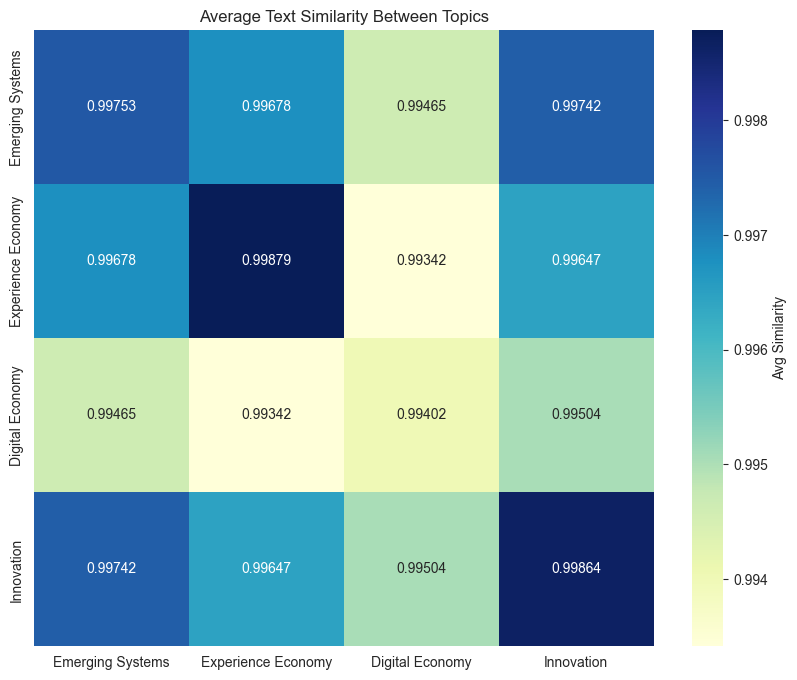

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu", fmt=".5f", cbar_kws={'label': 'Avg Similarity'})
plt.title("Average Text Similarity Between Topics")
plt.show()

In [33]:
similarity_df

,Emerging Systems,Experience Economy,Digital Economy,Innovation
Emerging Systems,0.997528,0.996785,0.994649,0.997425
Experience Economy,0.996785,0.998786,0.993415,0.996466
Digital Economy,0.994649,0.993415,0.994021,0.995036
Innovation,0.997425,0.996466,0.995036,0.998642


In [37]:
# mean when they are the same topic
avg = (0.997528 + 0.997528 + 0.998786 + 0.998642) / 4
print(avg)

0.998121
